## ptkinetic tutorial
_Thien-Phuc Tu-Nguyen_

**ptkinetic** is a package for kinetic simulation. With the initial concentrations and the rate constants, the package is able to plot the concentrations of all chemicals during time with an accuracy.

In [1]:
# Import important packages
import numpy as np
from ptkinetic import Kinetic
%matplotlib inline

In [2]:
# Create an Kinetic object
obj = Kinetic()

In [3]:
# Add the chemical and reaction
obj.add_chemical('A', 0.1) # Name, concentration, stable (default no)
obj.add_chemical('B', 0.5, True) # B does not change in the simulation
obj.add_chemical('C', 0.0)

obj.add_reaction(['A','B'], ['C'], 0.5)

In [4]:
# Initialization
obj.init(100) # The number of steps per cycle

In [5]:
obj.run(200, 0.01) # Run 200 cycles, each cycles last 0.01 time unit
obj.run(150, 0.02) # Can run again with different cycle time

In [6]:
# Access the pure result
print(obj.data[:5,:]) # First 5 rows
print(obj.data[-5:,:]) # Last 5 rows

[[  1.00000000e-01   5.00000000e-01   0.00000000e+00]
 [  9.97503091e-02   5.00000000e-01   2.49690878e-04]
 [  9.95012417e-02   5.00000000e-01   4.98758300e-04]
 [  9.92527962e-02   5.00000000e-01   7.47203823e-04]
 [  9.90049710e-02   5.00000000e-01   9.95029001e-04]]
[[ 0.02922854  0.5         0.07077146]
 [ 0.02908276  0.5         0.07091724]
 [ 0.02893771  0.5         0.07106229]
 [ 0.02879337  0.5         0.07120663]
 [ 0.02864976  0.5         0.07135024]]


/home/zeldery/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


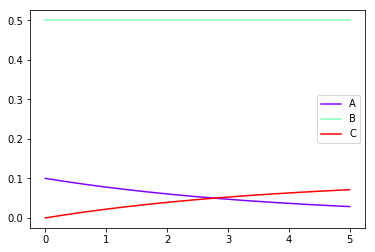

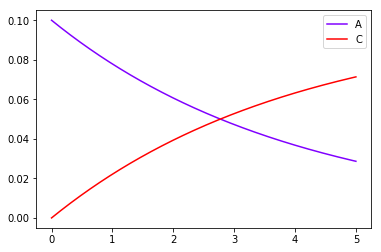

In [7]:
# Plotting
obj.plot() # Plot all of the data
obj.plot(['A','C']) # Plot exact name

### The checking mechanism

The simulation is only accurate if the change in each step is small enough, that instantaneous rate is approximately same with average rate. The package has a checking mechanism that can be turned on.

The checking step is based on the relative concentration change that has to be smaller than a predefined criterion.

If the error occurs, there are three possible ways to fix it:

* Increase number of steps per cycle in initilization step (do not change the data memory)
* Using smaller time of cycle in each cycle (it means you have to increase number of run cycle, and increase data memory needed)
* Using larger criterion

In [8]:
# Create the test case
test = Kinetic()
test.add_chemical('A',1e-5)
test.add_chemical('B',0.2)
test.add_chemical('C',0.0)
test.add_reaction(['A','B'],['C'],0.01)

test.init(1, True, 0.0001) # criterion is 1/10000

In [9]:
test.run(1000,0.1) #Error

/run/media/zeldery/1A426A3B426A1BAF/data/research/TS thiol oxidant/ptkinetic/ptkinetic/ptkinetic.py:118: RuntimeWarning: invalid value encountered in true_divide
  if self.check and np.where(temp != 0, np.abs(change_inp/temp) , 0.0).max() > self.criterion:


ValueError: The change in one step is too large, decrease the step size

In [10]:
# Solution number 1
test1 = Kinetic()
test1.add_chemical('A',1e-5)
test1.add_chemical('B',0.2)
test1.add_chemical('C',0.0)
test1.add_reaction(['A','B'],['C'],0.01)
test1.init(100, True, 0.0001)
test1.run(1000,0.1)

/run/media/zeldery/1A426A3B426A1BAF/data/research/TS thiol oxidant/ptkinetic/ptkinetic/ptkinetic.py:118: RuntimeWarning: invalid value encountered in true_divide
  if self.check and np.where(temp != 0, np.abs(change_inp/temp) , 0.0).max() > self.criterion:


In [11]:
# Solution number 2
test2 = Kinetic()
test2.add_chemical('A',1e-5)
test2.add_chemical('B',0.2)
test2.add_chemical('C',0.0)
test2.add_reaction(['A','B'],['C'],0.01)
test2.init(1, True, 0.0001)
test2.run(10000,0.01)

/run/media/zeldery/1A426A3B426A1BAF/data/research/TS thiol oxidant/ptkinetic/ptkinetic/ptkinetic.py:118: RuntimeWarning: invalid value encountered in true_divide
  if self.check and np.where(temp != 0, np.abs(change_inp/temp) , 0.0).max() > self.criterion:


In [12]:
# Solution number 3
test3 = Kinetic()
test3.add_chemical('A',1e-5)
test3.add_chemical('B',0.2)
test3.add_chemical('C',0.0)
test3.add_reaction(['A','B'],['C'],0.01)
test3.init(1, True, 0.01)
test3.run(1000,0.1)

/run/media/zeldery/1A426A3B426A1BAF/data/research/TS thiol oxidant/ptkinetic/ptkinetic/ptkinetic.py:118: RuntimeWarning: invalid value encountered in true_divide
  if self.check and np.where(temp != 0, np.abs(change_inp/temp) , 0.0).max() > self.criterion:
